<a href="https://colab.research.google.com/github/Genullz/Stroke-Prediction/blob/main/Copy_of_02_Core_Project_Part_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import the Packages

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn import set_config
set_config(display='diagram')

Load the Dataset

In [6]:
path = ('/content/drive/MyDrive/Data Science Bootcamp/Core Project 02/healthcare-dataset-stroke-data.csv')
df = pd.read_csv(path)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
# check for duplicates
df.duplicated().sum()

0

In [9]:
# Check for Missing Values
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Address inconsistent Values

In [10]:
# Change the age column from an object to an integer
df['age'] = df['age'].astype(float)

In [11]:
# encoding the smoking status column
df['smoking_status'].replace({'Unknown':0, 'smokes':1, 'formerly smoked':2, 'never smoked':3}, inplace=True)

In [12]:
# encoding the residence type column
df['Residence_type'].replace({'Rural': 0, 'Urban': 1}, inplace=True)

In [13]:
# encoding the work type column
df['work_type'].replace({'children': 0, 'Self-employed': 1, 'Private': 2, 'Govt_job': 3}, inplace=True)

In [14]:
# encoding the gender column
df['gender'].replace({'Female': 0, 'Male': 1}, inplace=True)

In [15]:
# encoding the ever_married column
df['ever_married'].replace({'No': 0, 'Yes': 1}, inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int64  
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   int64  
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   int64  
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 479.2+ KB


##Prepare the dataset

In [17]:
#identify
X = df.drop(columns='stroke', axis=1)
y = df['stroke']
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [18]:
#instantiate SimpleImputers with most_frequent and mean strategies
mean_imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()

In [19]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include = 'number')

In [20]:
# make pipeline
num_pipe = make_pipeline(mean_imputer, scaler)

In [21]:
# create tuples of (imputer, selector) for each datatype
num_tuple = (num_pipe, num_selector)

In [22]:
preprocessor = make_column_transformer(num_tuple, remainder='drop')
preprocessor

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f3db1bc3100>)])

In [23]:
# fit ColumnTransformer on the training data
preprocessor.fit(X_train, y_train)

# transform both the training and testing data (this will output a NumPy array)
X_train_imputed = preprocessor.transform(X_train)
X_test_imputed = preprocessor.transform(X_test)

In [24]:
X_train_imputed

array([[-0.05586109,  0.7372167 ,  3.1393509 , ...,  2.82330103,
         1.92630727,  1.09909132],
       [-1.55735572, -0.10654894, -0.31853719, ..., -0.48981357,
        -0.05081958,  0.30277483],
       [ 1.05981112,  0.38194696, -0.31853719, ..., -0.41189936,
         0.20932869,  0.30277483],
       ...,
       [-0.23289776, -1.87579225, -0.31853719, ..., -0.19686495,
        -1.44261283, -1.28985817],
       [ 1.20509871,  1.62539105, -0.31853719, ...,  1.97768977,
         0.27436576,  0.30277483],
       [-0.35363905,  0.11549465, -0.31853719, ..., -0.13369722,
         2.78479656, -0.49354167]])

##Creating multivariate (multiple variables) exploratory visualizations to further understand your data and search for trends

In [25]:
corr = df.corr()

<Figure size 1440x1080 with 0 Axes>

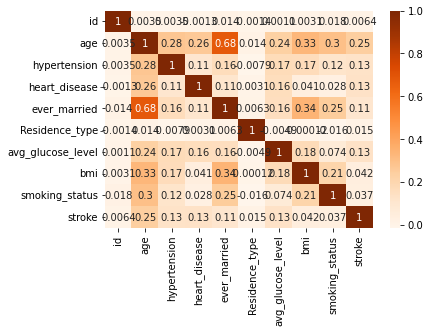

<Figure size 1440x1080 with 0 Axes>

In [26]:
# the heatmap
sns.heatmap(corr, cmap = 'Oranges', annot = True)
sns.set(font_scale=1)
plt.figure(figsize=(20, 15))

The is a moderate correlation between a age and marital status in this dataset with value of 0.68.

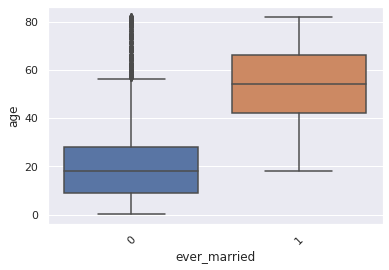

In [27]:
# boxplot
sns.boxplot(data=df, x='ever_married', y='age');
plt.xticks(rotation = 45);

In the Boxplot above, the average mean of age of unmarried patient is under 20 while the average mean age of married patient in our dataset is 55. This box plot shows the age range among potential stroke patients based on marital status.

Text(0, 0.5, 'Age')

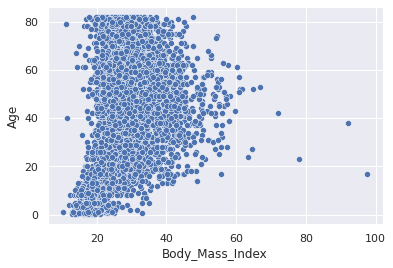

In [47]:
sns.scatterplot(
    x='bmi', 
    y='age', 
    data=df)
plt.xlabel(
    'Body_Mass_Index')
plt.ylabel(
    'Age')


In the Scatter plot above, it shows patient at the of age 24 and under, and those above the age of 75 have a lower Body Mass Index. Teenaegers and young adult are a lot mobile and tend to engage in more outdoor activities than any other age groups which contributes to a lower Body Mass Index.
  Those in of age range of 75 and up tend to shrink down in size the older they get which also contributes to a lower Body Mass Index. the scatter plot shows other age groups with a higher Body Mass Index. Obesity and Excess weight does increase the risk of severe illness and other health problems. 

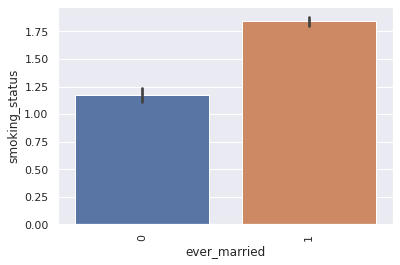

In [40]:
sns.barplot(data=df, x= 'ever_married', y= 'smoking_status')
plt.xticks(rotation = 90);

In this Barplot, we see that marital status corrolates with smoking status. we also see that married patients have a higher smoking rate than unmarried patients. Marriage can cause lots of stress that turns a none-smoker into a smoker.  